# Random Forest: Titanic Dataset

This exercise will use a random forest to try and predict whether or not passengers survived on the Titanic

## Import the Libraries and Modules

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # data visualization

import warnings
warnings.filterwarnings('ignore')

plt.style.use('ggplot')

## Import the Data

In [2]:
train_df= pd.read_csv('datasets/titanic_train.csv')
test_df = pd.read_csv('datasets/titanic_test.csv')

Make a backup copy of our training and testing data

In [3]:
train_copy = train_df.copy()
test_copy = test_df.copy()

Use the .info() function to get information about our datasets. This gives us information about each of the variables found in our data. We can see that our testing data contains all columns from our training data except for the Survived column. This column does not exist in our testing data because this is the data point which we are trying to predict in our testing data.

In [4]:
print(train_copy.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [5]:
print(test_copy.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB
None


We can use the .describe() function to give us statistical details about all of our numeric data points

In [6]:
print(train_copy.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


In [7]:
print(test_copy.describe())

       PassengerId      Pclass         Age       SibSp       Parch        Fare
count   418.000000  418.000000  332.000000  418.000000  418.000000  417.000000
mean   1100.500000    2.265550   30.272590    0.447368    0.392344   35.627188
std     120.810458    0.841838   14.181209    0.896760    0.981429   55.907576
min     892.000000    1.000000    0.170000    0.000000    0.000000    0.000000
25%     996.250000    1.000000   21.000000    0.000000    0.000000    7.895800
50%    1100.500000    3.000000   27.000000    0.000000    0.000000   14.454200
75%    1204.750000    3.000000   39.000000    1.000000    0.000000   31.500000
max    1309.000000    3.000000   76.000000    8.000000    9.000000  512.329200


## Cleaning and Dealing with Null values

Use the .isnull() function to get the number of null values for each variable

In [8]:
print(train_copy.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [9]:
print(test_copy.isnull().sum())

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


We can see that within our training data, that the Age, Cabin, and Embarked column all contain null values. Within our testing data the Age, Fare, and Cabin columns contain null data.

Let's first fill in the null values for the Age column in both our training and testing datasets. First display the median age in both datasets

In [17]:
print("Training data median age: " + str(train_copy['Age'].median()))
print("Testing data median age: " + str(test_copy['Age'].median()))

Training data median age: 28.0
Testing data median age: 27.0


Now that we have identified the current median ages in each of our datasets, let's replace the null values in each of the datasets with the median age, then examine the updated median age in our training and testing data.

In [19]:
train_copy['Age'].fillna(train_copy['Age'].median(), inplace=True)
test_copy['Age'].fillna(test_copy['Age'].median(), inplace=True)

print("Updated training data median age: " + str(train_copy['Age'].median()))
print("Updated testing data median age: " + str(test_copy['Age'].median()))

Updated training data median age: 28.0
Updated testing data median age: 27.0


Now let's handle null values in our Embarked column in our training data. First let's examine this column by printing out all of the possible values contained in this column as well as the most frequently occuring value.

In [20]:
print("Possible values for 'Embarked' column")
print(train_copy['Embarked'].unique())
print("\n")
print("Most commonly occuring value")
print(train_copy['Embarked'].mode()[0])

Possible values for 'Embarked' column
['S' 'C' 'Q' nan]


Most commonly occuring value
S


We can replace null values for the Embarked column with the most frequently occuring value in this column.

In [21]:
train_copy['Embarked'].fillna(train_copy['Embarked'].mode()[0], inplace=True)

Now let's deal with null values for the Fare column within our testing data. Since this is a numeric column, let's get the median value for fare and replace null fare prices with the median fare price

In [22]:
print("Median fare: " + str(test_copy['Fare'].median()))
test_copy['Fare'].fillna(test_copy['Fare'].median(), inplace=True)

Median fare: 14.4542


Since the PassengerId column is just a unique identifier, and doesn't impact predicting the target variable, we can go ahead and drop this column from both our training and testing data

In [23]:
train_copy.drop(columns=['PassengerId'], axis=1, inplace=True)
test_copy.drop(columns= ['PassengerId'], axis=1, inplace= True)

Verify null values have been replaced (TODO: Handle Cabin null values)

In [24]:
print(test_copy.isnull().sum())

Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       327
Embarked      0
dtype: int64


In [25]:
print(train_copy.isnull().sum())

Survived      0
Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      0
dtype: int64


## Exploratory Data Analysis

Now that we have dropped unnecessary columns and have (mostly) gotten rid of null values to the best of our ability, we can now explore our data. Let's start by previewing our training data.

In [26]:
train_copy.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Next let's get the number of occurences of each unique value occuring in each of our columns. We can get the total number of each value occurence as well as the total percentage of each value. Along with getting the counts and percentages, we can visualize the relationships as well.

In [28]:
print(train_copy['Survived'].value_counts())
print(train_copy['Survived'].value_counts(normalize=True))

0    549
1    342
Name: Survived, dtype: int64
0    0.616162
1    0.383838
Name: Survived, dtype: float64


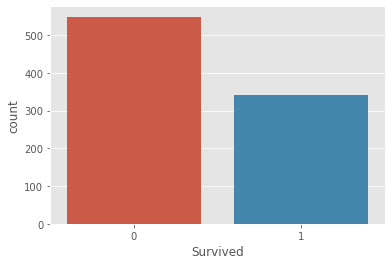

In [29]:
ax = sns.countplot(x="Survived", data=train_copy)

In [30]:
train_copy['Pclass'].value_counts()
print(train_copy['Pclass'].value_counts(normalize=True))

3    0.551066
1    0.242424
2    0.206510
Name: Pclass, dtype: float64
